<a href="https://colab.research.google.com/github/edwardoughton/spatial_computing/blob/main/8_01_Intro_to_Object_Oriented_Programming_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Object Oriented Programming Part 2

Previously we visited the basics of Object Oriented Programming (OOP), covering topics such as encapsulation, inheritance, polymorphism and abstraction.

Today our aim is to reinforce this approach to programming by working on an example which utilizes OOP.

We will focus on utilizing some of the existing processing techniques covered earlier within this class, but via an OOP approach.

The aim is to draw on more of the capabilities provided by `Shapely`, as this library will provide many important spatial functions which we can utilize in combination with our OOP approach.


## Point-in-Polygon Analysis

Often we may need to check if certain spatial objects reside within other spatial objects. This is a common operation within in Geographic Information Systems (GIS) and computational geometry, enabling us to undertake spatial queries.

For example, perhaps we want to estimate the number of buildings within a boundary area.

First, let us specify our points.

For the sake of simplicity, let us treat these as building 'centroids' (where a centroid in geometry represents the center of a two-dimensional shape).

This is the point coordinate that represents the average position of all the points in the shape, weighted by their respective location.


In [1]:
# Example: Creating a point class
from shapely.geometry import Point as ShapelyPoint, Polygon as ShapelyPolygon

class BuildingCentroid:
    def __init__(self, x, y):
        """
        Create a class for building centroids
        via x and y coordinates.

        :param x: X-coordinate of the point.
        :param y: Y-coordinate of the point.
        """
        self.x = x
        self.y = y
        self.shapely_point = ShapelyPoint(x, y)

Next, we can create a polygon boundary class which will have a similar structure, but also a method to carry out the intersection query.

We can do this as follows by specifying our properties and affiliated methods.

In [2]:
# Example: Create a polygon boundary class
from shapely.geometry import Point, Polygon as ShapelyPolygon, mapping

class Boundary:
    def __init__(self, list_of_coords):
        """
        Create a class for county boundaries via
        a list of x and y coordinates.

        """
        self.list_of_coords = list_of_coords
        # Create a Shapely Polygon object
        self.shapely_polygon = ShapelyPolygon(list_of_coords)

    def is_point_inside(self, point):
        """
        A method to check if a provided point is within this polygon.

        Parameters
        ----------
        point: tuple
          A tuple (x, y) representing the coordinates of the point.

        returns
        -------
        True if the point is inside the polygon, False otherwise.

        """
        shapely_point = Point(point)

        return shapely_point.within(self.shapely_polygon)


We now have both our point object class for our building centroids, and our polygon boundary class for our theoretical boundaries.

We can instantiate both as follows:

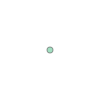

In [13]:
# Example: Instantiate our classes
point = BuildingCentroid(2, 2)
print(point)
point.shapely_point

In [9]:
# Example: Explore our point class properties
print(BuildingCentroid(4,5).x)
print(BuildingCentroid(4,5).y)
print(BuildingCentroid(4,5).shapely_point)

4
5
POINT (4 5)


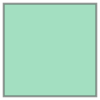

In [12]:
# Example: Instantiate our polygon class
polygon = Boundary([(0, 0), (4, 0), (4, 4), (0, 4)])
print(polygon)
polygon.shapely_polygon

In [14]:
# Example: Explore our polygon class properties
print(polygon.shapely_polygon)
print(polygon.list_of_coords)

POLYGON ((0 0, 4 0, 4 4, 0 4, 0 0))
[(0, 0), (4, 0), (4, 4), (0, 4)]


Finally, we can apply our method to an example.

We do this by stating the local name of the object, e.g., `polygon` and then the method e.g., `.is_point_inside()`.

Note: You should be careful to pass the method the correct data structure. Here, we need to pass an x, y tuple, hence `(point.x, point.y)`. We could re-write this to accept the `Shapely` object if we wanted to, but this approach suffices. You do need to think about the data structure though, or you might receive an error.   

In [15]:
# Example: Using our point-in-polygon method
print("Point is inside:", polygon.is_point_inside((point.x, point.y)))

Point is inside: True


## Using real data

Let us run through this with some actual data.  

First, we need to import the files from the MyMason class content section. We should have a dramatically reduced dataset for the building outlines in Lome, Togo. As well as a polygon boundary.


In [16]:
# Example: Loading data from a local machine
from google.colab import files
uploaded = files.upload()

Saving lome.cpg to lome.cpg
Saving lome.dbf to lome.dbf
Saving lome.prj to lome.prj
Saving lome.qmd to lome.qmd
Saving lome.shp to lome.shp
Saving lome.shx to lome.shx
Saving subset_buildings_togo.cpg to subset_buildings_togo.cpg
Saving subset_buildings_togo.dbf to subset_buildings_togo.dbf
Saving subset_buildings_togo.prj to subset_buildings_togo.prj
Saving subset_buildings_togo.qmd to subset_buildings_togo.qmd
Saving subset_buildings_togo.shp to subset_buildings_togo.shp
Saving subset_buildings_togo.shx to subset_buildings_togo.shx


Now we have this data locally available, we can carry out the following processing steps for our building data.

For example,

*   Load in our building outlines.
*   Obtain the centroid.
*   Instantiate our objects.
*   Append them to a list.

In [17]:
# Example: Process our building points for real data
import geopandas as gpd

# Load in our building data as a GeoDataFrame
# The `[:10]` subsets the first 10 rows for efficiency.
buildings = gpd.read_file('subset_buildings_togo.shp', crs='epsg:4326')#[:10]

# Convert our GeoDataFrame to a list of dictionaries for iteration
buildings = buildings.to_dict('records')

building_objects = []

# Iterate over our list of dictionaries
for item in buildings:

  # Get the building centroid
  centroid = item['geometry'].representative_point()

  # Instantiate our point class
  point = BuildingCentroid(centroid.x, centroid.y)

  # Append our point object to a list
  building_objects.append(point)

print(building_objects)

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


[<__main__.BuildingCentroid object at 0x7c83c8657070>, <__main__.BuildingCentroid object at 0x7c83c86267d0>, <__main__.BuildingCentroid object at 0x7c838f9e35e0>, <__main__.BuildingCentroid object at 0x7c838f9e36a0>, <__main__.BuildingCentroid object at 0x7c838f9e16c0>, <__main__.BuildingCentroid object at 0x7c838f9e1ba0>, <__main__.BuildingCentroid object at 0x7c838f9e1c90>, <__main__.BuildingCentroid object at 0x7c838f9e28c0>, <__main__.BuildingCentroid object at 0x7c838f9e3880>, <__main__.BuildingCentroid object at 0x7c838f9e3070>, <__main__.BuildingCentroid object at 0x7c838f9e29b0>, <__main__.BuildingCentroid object at 0x7c838f9e2230>, <__main__.BuildingCentroid object at 0x7c838f9e34f0>, <__main__.BuildingCentroid object at 0x7c838f9e33a0>, <__main__.BuildingCentroid object at 0x7c838f9e1a20>, <__main__.BuildingCentroid object at 0x7c838f9e2860>, <__main__.BuildingCentroid object at 0x7c838f9e1ae0>, <__main__.BuildingCentroid object at 0x7c838f9e27a0>, <__main__.BuildingCentroid 

And then we can do the same for our boundaries:

* Load our boundary data.
* Extract our coordinates from the `Shapely` geometry to a list.
* Instantiate our object.
* Append object to a list.

In [21]:
# Example: Process our polygon boundary using real data
import geopandas as gpd

# Load in our polygon as a GeoDataFrame
boundary = gpd.read_file('lome.shp', crs='epsg:4326')

# Convert our GeoDataFrame to a list of dictionaries for iteration
boundaries = boundary.to_dict('records')

boundary_objects = []

# Iterate over our list of dictionaries
for item in boundaries:

  # Extract our coordinates from a Shapely object to a list
  list_of_coords = list(item['geometry'].exterior.coords)

  # Instantiate our polygon class
  polygon = Boundary(list_of_coords)

  # Append our polygon object to a list
  boundary_objects.append(polygon)

print(boundary_objects)

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


Now we can carry out the processing we have been building towards.

We need to loop over our boundaries and our building centroid points at the same time.

For those that intersect, we can allocate a variable indicating `True`. Whereas those that do not intersect, we can allocate `False`.

Finally, we can append to a list using a GeoJSON format.

In [25]:
# Example: Loop over all objects for point-in-polygon analysis

output = []

# Loop over our boundaries
for boundary in boundary_objects:

  # Loop over our building centroids
  for building_centroid in building_objects:

    # Loop control logic to catch those inside the polygon
    if boundary.is_point_inside((building_centroid.x,building_centroid.y)):
      is_within = True
    else:
      is_within = False

    # Append object to list
    output.append({
        'geometry': building_centroid.shapely_point,
        'properties': {
            'within?': is_within
        }
    })

output = gpd.GeoDataFrame.from_features(output, crs='epsg:4326')
output.to_file('results.shp')

You should now export the results and go view them in your GIS software.

Think critically about the output, and how you could change/alter the processing to apply to other problems.

This is an important validation step and one which should boost your critical thinking skills.

## GeoJSON

The `GeoJSON` format allows us to code geographical data structures using JavaScript Object Notation (JSON). We are able to represent simple geographical features using this approach, such as points, lines, and polygons, as well as more complex objects like multipoint objects, multiline objects, multipolygon objects, Feature Collections etc.

Often, `GeoJSON` is a preferred format for sharing spatial data between web servers and web clients, particularly in web mapping applications. Generally, the `GeoJSON` format is regarded as a relatively simple and easy format to utilize and is compatible with JavaScript.

Do inspect the `GeoJSON` website for more information: https://geojson.org/

See examples below for how we write a `GeoJSON` point, line and polygon.

In [26]:
# Example: GeoJSON point data structure
my_point = {
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
my_point

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [125.6, 10.1]},
 'properties': {'name': 'Dinagat Islands'}}

In [27]:
# Example: GeoJSON linestring data structure
my_line = {
  "type": "Feature",
  "geometry": {
    "type": "LineString",
    "coordinates": [
      [100, 0],
      [101, 1],
      [102, 0],
      [103, 1]
    ]
  },
  "properties": {
    "name": "Example Line"
  }
}
my_line

{'type': 'Feature',
 'geometry': {'type': 'LineString',
  'coordinates': [[100, 0], [101, 1], [102, 0], [103, 1]]},
 'properties': {'name': 'Example Line'}}

In [28]:
# Example: GeoJSON polygon data structure
my_polygon = {
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [100, 0],
        [101, 0],
        [101, 1],
        [100, 1],
        [100, 0]
      ]
    ]
  },
  "properties": {
    "name": "Example Polygon"
  }
}
my_polygon

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[100, 0], [101, 0], [101, 1], [100, 1], [100, 0]]]},
 'properties': {'name': 'Example Polygon'}}

As we have already shown, you can convert a list of `GeoJSON` dictionaries into a `GeoDataFrame` using the `.from_features()` function.

This is handy, as you can then easily manipulate or write our your final data using `GeoPandas`.

In [30]:
# Example: Converting a list of GeoJSON dictionaries to a gpd

# Create a list of GeoJSON dictionaries
output = [{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}]

# Convert to a gpd
output = gpd.GeoDataFrame.from_features(output, crs='epsg:4326')

# Write out to a .shp
output.to_file('demo_gpd.shp')


## Task

Using the OpenStreetMap and GADM data you have already become accustomed to using, download Points of Interest data for a region you would like to learn more about (remember, staying smaller will help).

Carry out the following:


*   Create a Point of Interest class.
*   Create a polygon boundary class with a method to undertake a point-in-polygon analysis.
*   Load in your data, loop over each item and instantiate your objects, finally saving to a list.
*   Then undertake your point-in-polygon analysis.
*   Export your data to a .shp file for viewing in a piece of GIS software.








In [ ]:
# Enter your attempt below


## Task

For your Point of Interest (PoI) class:

* Add in a method which allows you to measure the distance to another set of provided PoI coordinates.
* Iterate over your lists of objects and measure the distance to a single other PoI.
* Write out the distance (in meters) to this object, by adding this distance as an attribute in the GeoJSON properties.




In [ ]:
# Enter your attempt below
